In [35]:
import numpy as np 
import pandas as pd
from sklearn.model_selection  import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

#Importa as bibliotecas

In [36]:
df = pd.read_csv('dados_produtos.csv',sep=',')
#Importa os dados

In [37]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [38]:
df.info() #Mostra as informações

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [39]:
df.describe() #Mostra as informações

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [40]:
ratings_treino, ratings_teste, produtos_treino, produtos_teste = train_test_split(
    df[['rating']], df['product_name'], 
    test_size=0.2, 
    random_state=42 
)

# Dividindo a base de dados em treino e teste

In [41]:
modelo = DecisionTreeClassifier()  # Cria o modelo  de Machine Learning Árvore de decisão
modelo.fit(ratings_treino, produtos_treino)  # Treinamento do modelo

DecisionTreeClassifier()

In [42]:
predicoes = modelo.predict(ratings_teste)
print("Predições:", predicoes)
print("Ratings de teste:", ratings_teste.values) # Fazendo predições do modelo

Predições: ['Notebook' 'Televisão' 'Celular' 'Videogame' 'Videogame' 'Cafeteira'
 'Televisão' 'Notebook' 'Celular' 'Cafeteira' 'Notebook' 'Cafeteira'
 'Cafeteira' 'iPod' 'Celular' 'Videogame' 'Celular' 'Celular' 'Celular'
 'iPod']
Ratings de teste: [[4.36]
 [4.24]
 [4.01]
 [4.98]
 [3.45]
 [4.31]
 [4.49]
 [3.38]
 [4.43]
 [3.04]
 [4.18]
 [3.02]
 [3.04]
 [4.45]
 [3.99]
 [5.  ]
 [3.87]
 [3.69]
 [4.42]
 [4.12]]



----------------- Árvore de Decisão do Produto Televisão ----------------

Avaliação do modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 1.0
Recall Score: 0.3333333333333333
Confusion Matrix: [[1 0]
 [2 1]]

Visualização da Árvore:

----------------- Árvore de Decisão do Produto Celular ----------------

Avaliação do modelo: 

Accuracy Score: 0.6
F1 Score: 0.6666666666666666
Precision Score: 0.5
Recall Score: 1.0
Confusion Matrix: [[1 2]
 [0 2]]

Visualização da Árvore:

----------------- Árvore de Decisão do Produto Cafeteira ----------------

Avaliação do modelo: 

Accuracy Score: 0.5
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[1 0]
 [1 0]]

Visualização da Árvore:

----------------- Árvore de Decisão do Produto Videogame ----------------

Avaliação do modelo: 

Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Confusion Matrix: [[4]]

Visualização da Árvore:

----------------- Árvore de Decisão do Produto iPod --------

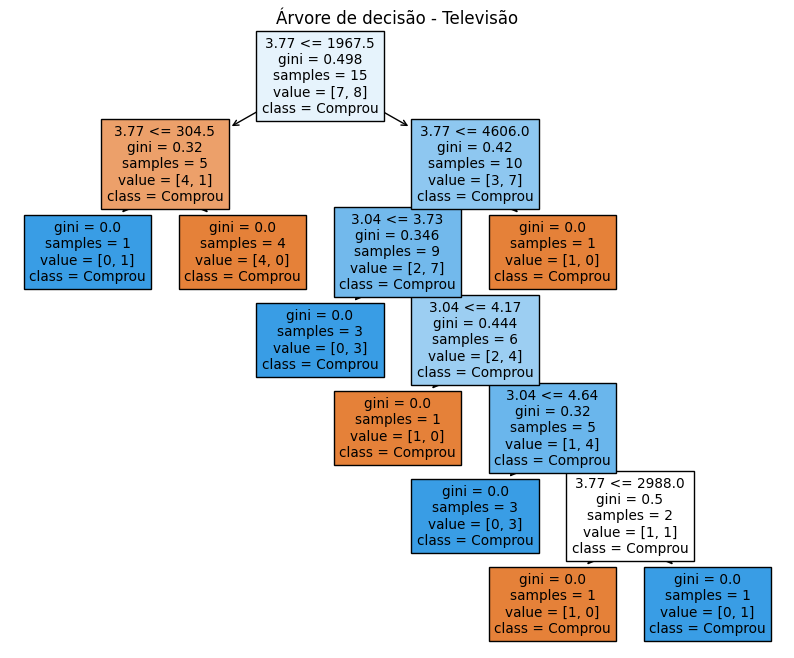

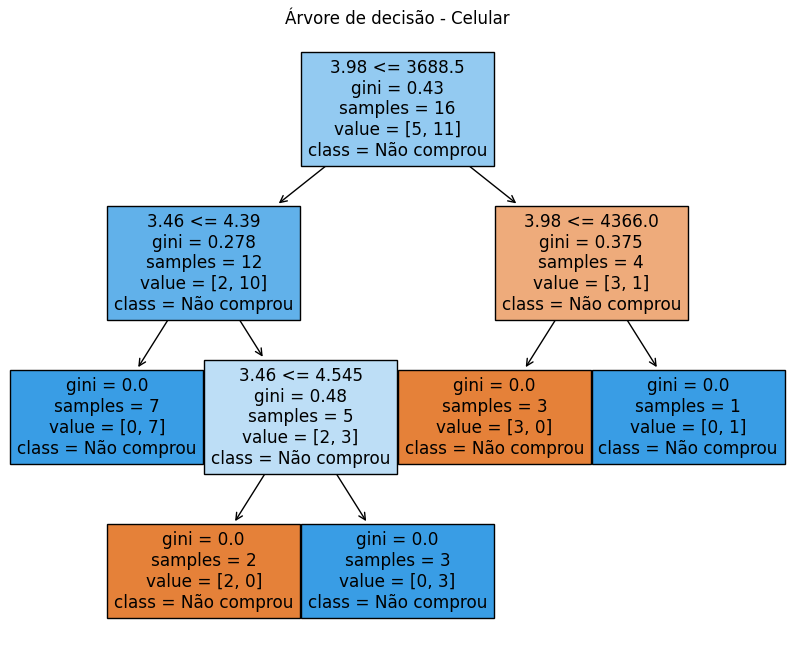

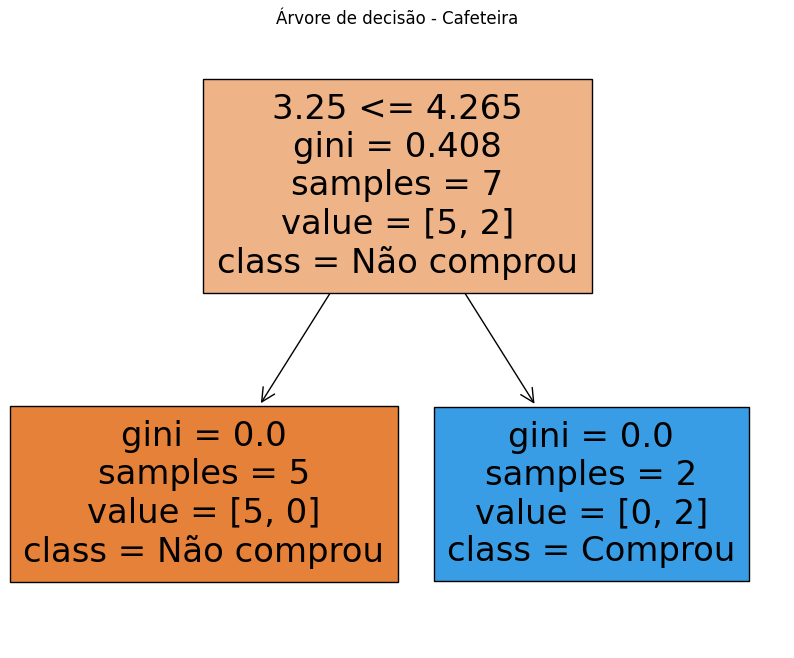

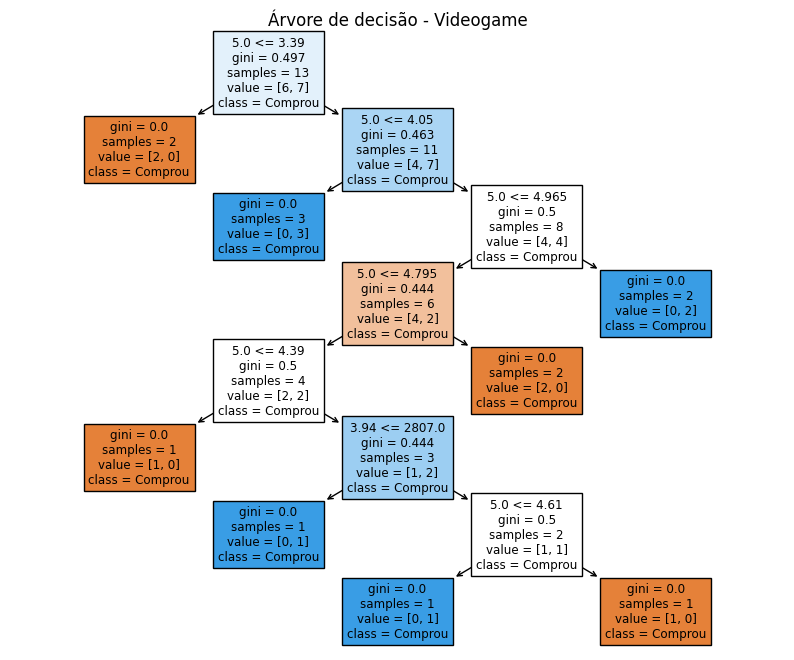

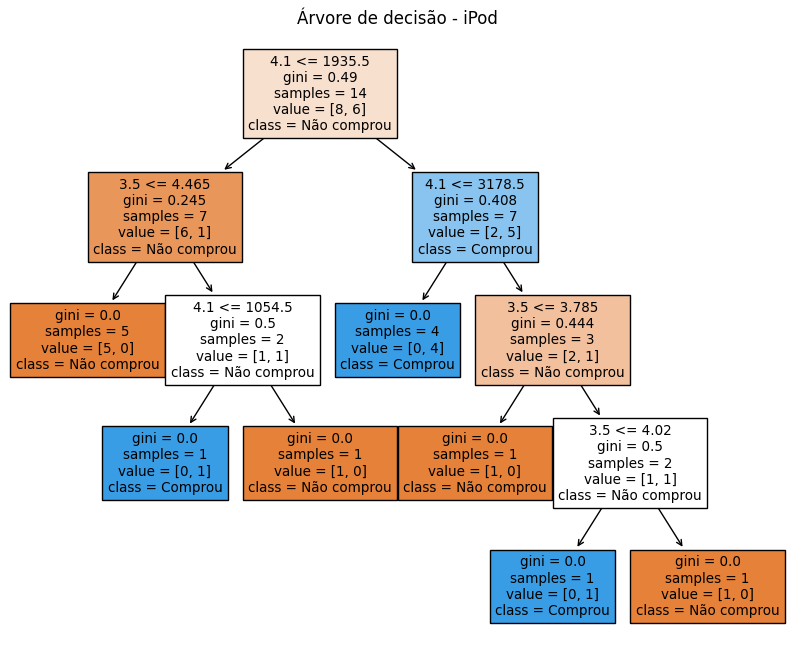

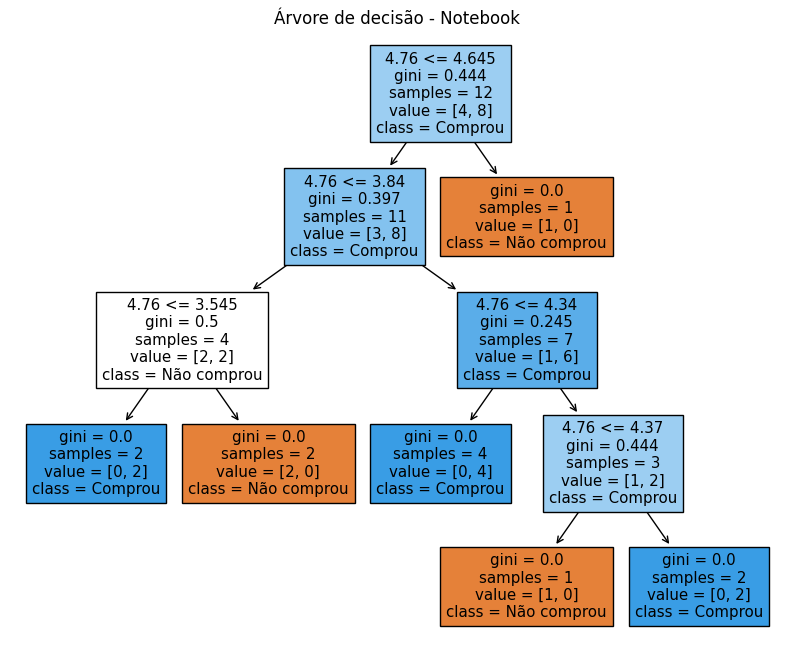

In [50]:
products=df['product_name'].unique()

for product in products:
    print(f'\n----------------- Árvore de Decisão do Produto {product} ----------------\n')
    product_df = df.loc[df['product_name'] == product]

    X= product_df.drop(['purchased', 'product_name'], axis=1)
    y= product_df['purchased']
    X_train, x_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)
    dtc= DecisionTreeClassifier()
    model= dtc.fit(X_train, y_train)
    y_pred = dtc.predict(x_test)

    print('Avaliação do modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test,y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

    print('\nVisualização da Árvore:')

    product_df['purchased'] = product_df['purchased'].replace([1,0], ['Comprou', 'Não comprou'])
    fig = plt.figure(figsize=(10,8)) 
    
    tree.plot_tree(model, feature_names=product_df['rating'].tolist(), class_names=product_df['purchased'].tolist(),filled=True)
    plt.title(f'Árvore de decisão - {product}')

In [49]:
import warnings 
warnings.filterwarnings('ignore')

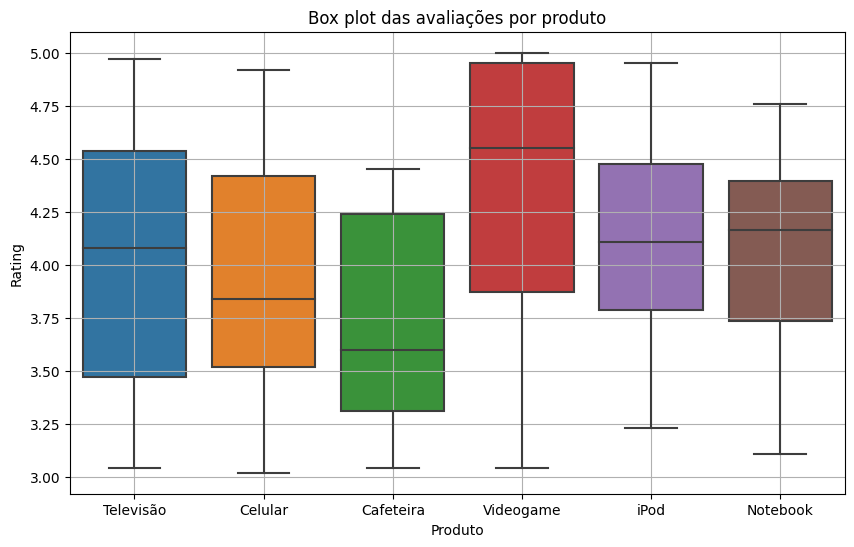

In [27]:
plt.figure(figsize=(10, 6))
plt.title('Box plot das avaliações por produto')
sns.boxplot(x='product_name', y='rating', data=df)
plt.ylabel('Rating')
plt.xlabel('Produto')
plt.grid()
plt.show()